In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day38-missing-indicator/train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [10]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [11]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
X_train.values.shape

(712, 2)

In [12]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [13]:
X_train.head(10)

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
213,30.0,13.0000,30.0
157,30.0,8.0500,30.0
780,13.0,7.2292,13.0
572,36.0,26.3875,36.0
77,NaN,8.0500,NaN


In [14]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
# X_train['Age_imputed'][X_train['Age_imputed'].isnull()] 1st primary col where u apply ur random value then secondary column

X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values
#                                                       (HERE X_TRAIN BECAUSE OUR RANDOMLY SELECTED TEST_SET CONTAINS ALL nAn VALUES THEN ?)

In [15]:
X_test

,Age,Fare,Age_imputed
707,42.0,26.2875,42.0
37,21.0,8.0500,21.0
615,24.0,65.0000,24.0
169,28.0,56.4958,28.0
68,17.0,7.9250,17.0
...,...,...,...
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,4.0
870,26.0,7.8958,26.0


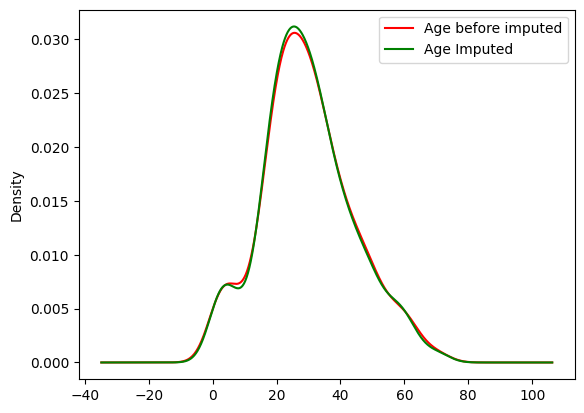

In [16]:
# Plotting
X_train['Age'].plot(kind = 'kde' , c = 'r' , label = 'Age before imputed')
X_train['Age_imputed'].plot(kind = 'kde' , c = 'g' , label = 'Age Imputed')
plt.legend()
plt.show()

# As u can see the both distribution is almost same so it's good to use random distribution in case of Linear,Logistic Regression
# But it will not work in Tree based model

In [17]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.34951339046142
Variance after random imputation:  199.77432769402174


In [18]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,59.431472
Age,71.512440,204.349513,204.349513
Age_imputed,59.431472,204.349513,199.774328


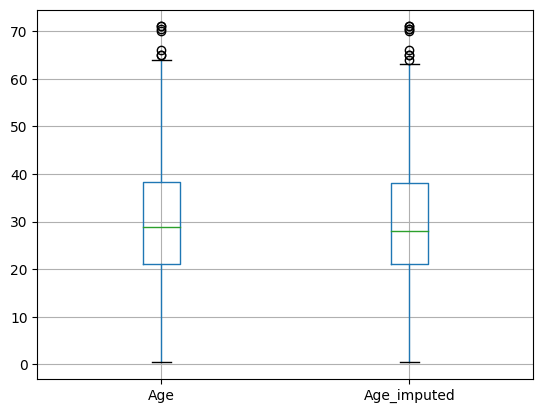

In [19]:
X_train[['Age', 'Age_imputed']].boxplot()
plt.show()

In [20]:
data = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day38-missing-indicator/house-train.csv' , usecols = ['GarageQual','FireplaceQu', 'SalePrice'])
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [21]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [22]:
X = data # For plotting the graph purpose
y = data['SalePrice']

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2) 

In [24]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [25]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
1181,Gd,TA,392500,TA,Gd
82,Gd,TA,245000,TA,Gd
211,NaN,TA,186000,TA,NaN
1248,Gd,Fa,129500,Fa,Gd
676,NaN,Fa,87000,Fa,NaN


In [26]:
X_train['FireplaceQu_imputed'][X_train['FireplaceQu'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_train['GarageQual_imputed'][X_train['GarageQual'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values

X_test['FireplaceQu_imputed'][X_test['FireplaceQu'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

C:\Users\arups\AppData\Local\Temp\ipykernel_308\2679777837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['FireplaceQu_imputed'][X_train['FireplaceQu'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
C:\Users\arups\AppData\Local\Temp\ipykernel_308\2679777837.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GarageQual_imputed'][X_train['GarageQual'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
C:\Users\arups\AppData\Local\Temp\ipykernel_308\2679777837.py:4: SettingWithCopyWarning: 
A value is tryin

In [27]:
# USING PANDAS 
temp = pd.concat(
[
    X_train['GarageQual'].value_counts()/len(X_train['GarageQual'].dropna()),
    X_train['GarageQual_imputed'].value_counts()/len(X_train)
] , axis = 1)
temp.columns = ['Original' , 'imputed']

In [35]:
# USING NUMPY 
a = (X_train['GarageQual'].value_counts()/len(X_train['GarageQual'].dropna())).values
b =  (X_train['GarageQual_imputed'].value_counts()/len(X_train)).values
a = pd.DataFrame(a , columns  =['original'])
b = pd.DataFrame(b , columns  =['imputed'])
temp2 = np.concatenate((a ,b) , axis = 1)
temp2 = pd.DataFrame(temp2 , columns = ['Original' , 'imputed'])
temp2

,Original,imputed
0,0.951043,0.952055
1,0.037171,0.036815
2,0.009973,0.009418
3,0.000907,0.000856
4,0.000907,0.000856


In [36]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp
# Now the correlation btw original and imputed varies so this is a RED FLAG

,original,imputed
Gd,0.494272,0.650954
TA,0.412439,0.540965
Fa,0.040917,0.053872
Po,0.027823,0.035915
Ex,0.024550,0.029181


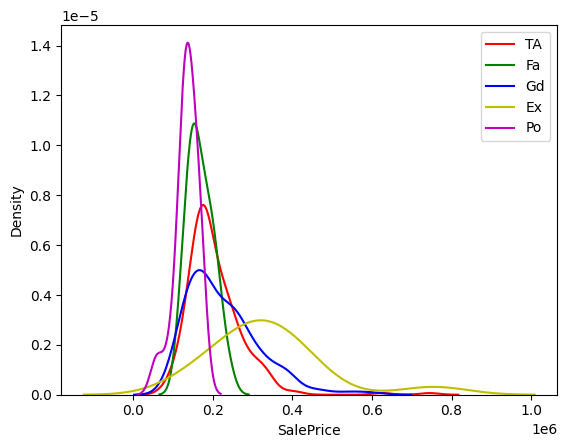

In [54]:
# DISTRIBUTION PLOT BEFORE IMPUTED
color = {'TA': 'r', 'Gd': 'b', 'Fa': 'g', 'Ex': 'y', 'Po': 'm'}

for category in X_train['FireplaceQu'].dropna().unique() :
    
    sns.kdeplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'] , c = color[category], label = category)
plt.legend()
plt.show()

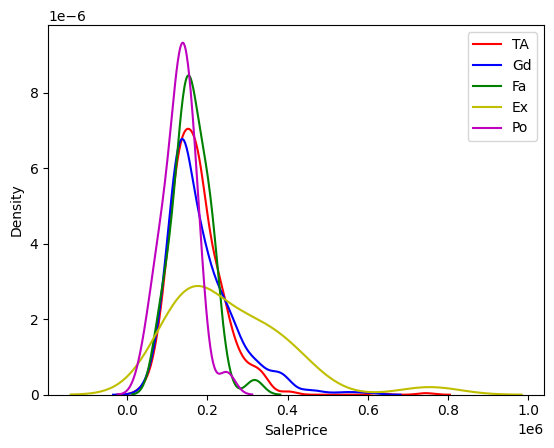

In [53]:
# AFTER IMPUTATION

color = {'TA': 'r', 'Gd': 'b', 'Fa': 'g', 'Ex': 'y', 'Po': 'm'}

for category in X_train['FireplaceQu_imputed'].unique():
    sns.kdeplot(data=X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'], color=color[category], label=category)
    
plt.legend()
plt.show()
